# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
1) Mice that were treated with the Capomulin and Ramican regimes had their tumor volume decrease over time. This suggests that these treatments were effective
2) Mice that were given Infubinol had the highest final tumor volumes compared with those that were treated with the other three medicines. This means that Infubinol might be the least effective treatment
3) For mice treated with Capomulin there is a positive correlation between weight and average tumor volume. This indicates that heavier mice tend to have bigger tumors. This information could have impolications in the production of effetive treatments for big tumors. 
 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
display(merged_df.head())


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
print(f"Number of unique mice: {num_mice}")


Number of unique mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
print(f"The following mouse IDs have duplicate timepoints: {duplicate_mice_ids}")
print()

# Displaying the data associated with that mouse ID
for mouse_id in duplicate_mice_ids:
    print(f"Data for Mouse ID {mouse_id}:")
    display(study_results[study_results['Mouse ID'] == mouse_id])
    print()

# Creating a clean DataFrame by dropping the duplicate mouse by its ID and Timepoint
clean_study_results = study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

The following mouse IDs have duplicate timepoints: ['g989']

Data for Mouse ID g989:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {num_mice}")

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_data

Number of unique mice: 249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()



249

## Summary Statistics

In [12]:
# Group the data by drug regimen and calculate the required statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary statistics table
summary_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Group the clean data by Drug Regimen and calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = clean_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics table
print(summary_statistics)

# Alternatively, we can use the aggregate method to calculate all of these statistics in a single line of code
summary_statistics_aggregate = clean_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics table using the aggregate method
print(summary_statistics_aggregate)


              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.458254            50.854632              44.053659   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_SE

## Bar and Pie Charts

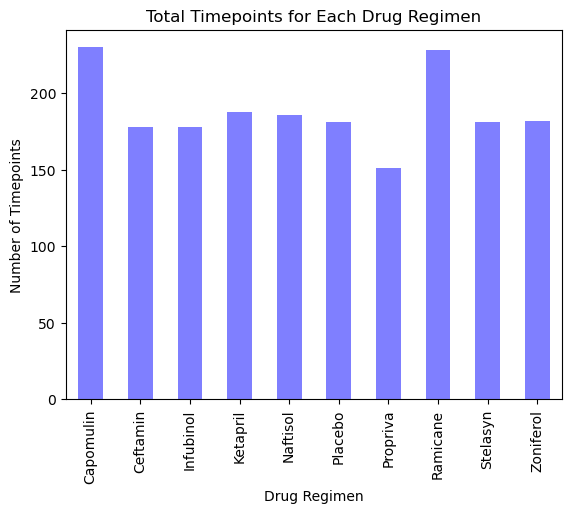

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug.
# Group the clean_data DataFrame by drug regimen and count the number of timepoints.
timepoints_count = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot 
ax = timepoints_count.plot(kind='bar', color='blue', alpha=0.5, align='center')

# Set the title and axis labels
ax.set_title('Total Timepoints for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Timepoints')

# Display the plot
plt.show()



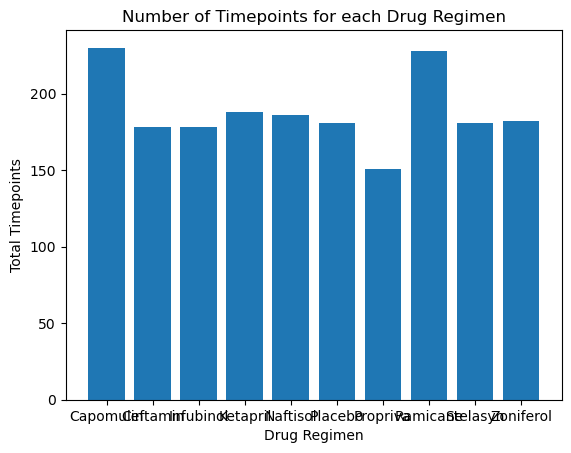

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# group the data by drug regimen and count the number of timepoints
regimen_timepoints = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# create a bar plot using pyplot
plt.bar(regimen_timepoints.index, regimen_timepoints.values)

# add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Number of Timepoints for each Drug Regimen')

# display the plot
plt.show()



<AxesSubplot:title={'center':'Distribution of Mice by Gender'}, ylabel='Sex'>

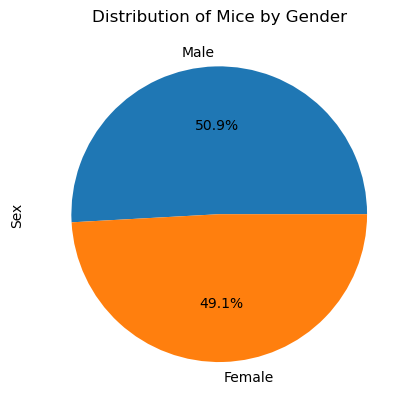

In [17]:
# Generate a pie plot showing the distribution of female versus male mice
# Group the data by sex and count the number of mice in each category
gender_counts = clean_data['Sex'].value_counts()

# Generate a pie plot 
gender_counts.plot(kind='pie', y='Sex', title='Distribution of Mice by Gender', autopct='%1.1f%%')



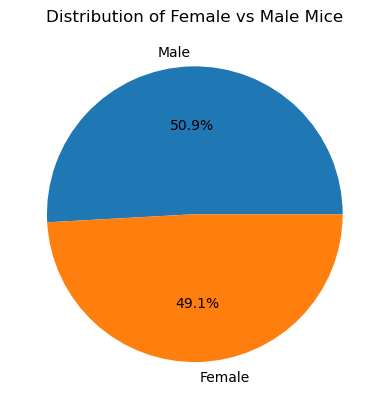

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the count of male and female mice
gender_count = clean_data['Sex'].value_counts()

# Create a pie plot
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_results.groupby(['Mouse ID'])['Timepoint'].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merged_data = merged_data.loc[merged_data['Drug Regimen'].isin(treatment_regimens)]
merged_data = pd.merge(merged_data, max_timepoint, on=['Mouse ID', 'Timepoint'])

# Get the final tumor volume of each mouse for the selected treatment regimens
final_tumor_volume = merged_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the resulting DataFrame
print(final_tumor_volume.head())


  Mouse ID Drug Regimen  Tumor Volume (mm3)
0     k403     Ramicane           22.050126
1     s185    Capomulin           23.343598
2     x401    Capomulin           28.484033
3     m601    Capomulin           28.430964
4     g791     Ramicane           29.128472


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through treatments and calculate IQR and outliers for each
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_data.loc[clean_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print summary statistics and outliers
    print(f"Results for {treatment}:")
    print(f"-----------------------")
    print(f"Median tumor volume: {quartiles[0.5]:.2f}")
    print(f"Lower quartile: {lowerq:.2f}")
    print(f"Upper quartile: {upperq:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    if outliers.any():
        print("Outliers:")
        print(outliers)
    print(f"-----------------------\n")

    

Results for Capomulin:
-----------------------
Median tumor volume: 41.56
Lower quartile: 37.69
Upper quartile: 45.00
IQR: 7.31
Lower bound: 26.71
Upper bound: 55.97
Outliers:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
-----------------------

Results for Ramicane:
-----------------------
Median tumor volume: 40.67
Lower quartile: 36.67
Upper quartile: 45.00
IQR: 8.33
Lower bound: 24.19
Upper bound: 57.49
Outliers:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
-----------------------

Results for Infubinol:
-----------------------
Median tumor volume: 51.82
Lower quartile: 47.31
Upper quartile: 57.31
IQR: 10.00
Lower bound: 32.31
Upper bound: 72.32
-----------------------

Results for Ceftamin:
-----------------------
Median tumor volume: 51.78
Lower quartile: 47.21
Upper quartile: 56.80
IQR: 9.59
Lower bound: 32.82
Upper bound: 71.19
-----------------------



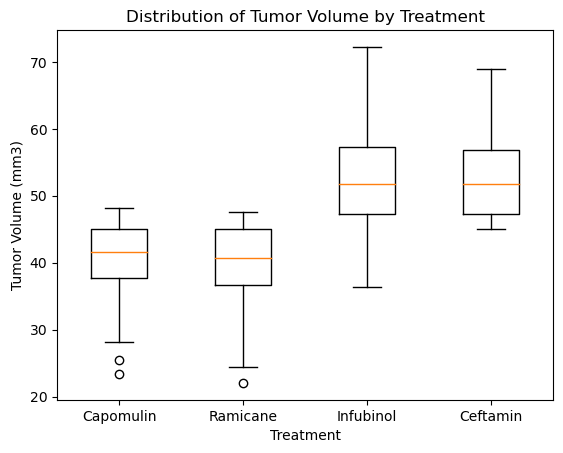

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment
tumor_data = []

# Loop through each treatment and get the tumor volume data
for treatment in treatments:
    # Subset the clean_data DataFrame to get only the tumor volume data for the current treatment
    tumor_volume = clean_data.loc[clean_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Append the tumor volume data to the tumor_data list
    tumor_data.append(tumor_volume)

# Create a box plot of the tumor volume data for each treatment
fig, ax = plt.subplots()
ax.boxplot(tumor_data, labels=treatments)
ax.set_title('Distribution of Tumor Volume by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()




## Line and Scatter Plots

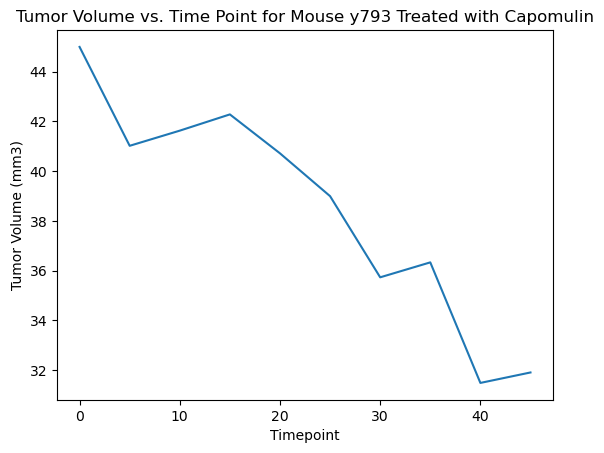

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter the data to only include mice treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select a random mouse ID from the filtered data
mouse_id = capomulin_data['Mouse ID'].sample().iloc[0]

# Filter the data to only include data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.show()



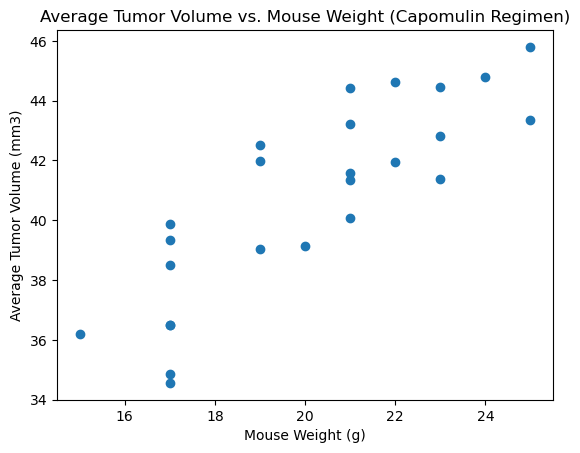

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter data to only include Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume and mouse weight for each mouse
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]

# Generate scatter plot of average tumor volume vs. mouse weight
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Set title and axis labels
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()




## Correlation and Regression

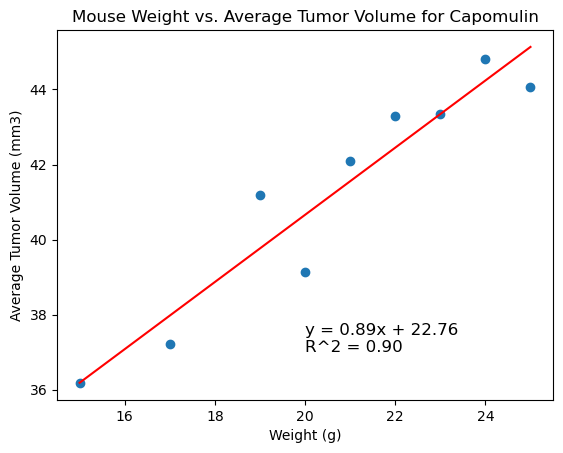

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a subset of the Capomulin data with just the relevant columns
capomulin_subset = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin', ['Weight (g)', 'Tumor Volume (mm3)']]

# Calculate the average tumor volume for each mouse on Capomulin
capomulin_avg_vol = capomulin_subset.groupby('Weight (g)').mean().reset_index()

# Calculate the correlation coefficient between weight and average tumor volume for Capomulin
correlation = capomulin_avg_vol['Weight (g)'].corr(capomulin_avg_vol['Tumor Volume (mm3)'])

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg_vol['Weight (g)'], capomulin_avg_vol['Tumor Volume (mm3)'])
regress_values = slope * capomulin_avg_vol['Weight (g)'] + intercept

# Create scatter plot and linear regression line
plt.scatter(capomulin_avg_vol['Weight (g)'], capomulin_avg_vol['Tumor Volume (mm3)'])
plt.plot(capomulin_avg_vol['Weight (g)'], regress_values, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')

# Display correlation coefficient and linear regression equation on plot
equation = f'y = {slope:.2f}x + {intercept:.2f}\nR^2 = {rvalue**2:.2f}'
plt.annotate(equation, (20, 37), fontsize=12)

plt.show()





